In [1]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/futagoya/6-machine-learning-predict-insurance-cost/main/insurance.csv'
df = pd.read_csv(url)

# Machine Learning Project: Predict Insurance Cost

## Dataset on: https://www.kaggle.com/datasets/mirichoi0218/insurance 

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1. Check the Dataset's information and the null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 2. Convert object to numerical values

In [7]:
df['sex']=df['sex'].map({'female':0,'male':1})
df['smoker']=df['smoker'].map({'no':0,'yes':1})
df['region']=df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# 3. Store independent variable to X and dependent variable to y

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
X = df.drop(['charges'],axis=1)
y = df['charges']

# 4. Split the data into training & test set

### 1. Split the data

### 2. Train the models on training set

### 3. Test the models on testing set

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

# 5. Import the Models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 6. Model Training

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
svm = SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

# 7. Predict the Test Data

In [14]:
y.pred1 = lr.predict(X_test)
y.pred2 = svm.predict(X_test)
y.pred3 = rf.predict(X_test)
y.pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,
                   'LinearRegression':y.pred1,
                   'SVR':y.pred2,
                   'RandomForestRegressor':y.pred3,
                   'GradientBoostingRegressor':y.pred4})

In [15]:
df1

,Actual,LinearRegression,SVR,RandomForestRegressor,GradientBoostingRegressor
698,10976.24575,13196.935858,9188.428402,11809.045501,11981.145025
520,25656.57526,10037.562478,9150.759023,9778.092822,10071.572417
1144,9630.39700,11693.190552,9153.113163,11841.912758,10900.582910
908,15170.06900,18033.620307,9215.436197,17110.179338,17571.372648
559,1646.42970,4629.542008,8983.860753,2436.805055,4285.501184
...,...,...,...,...,...
851,14119.62000,15089.060974,9210.940991,16914.923276,17549.302169
109,47055.53210,38782.298308,9218.081345,48099.279914,45886.464957
941,9549.56510,16299.799609,9152.670158,9573.073092,9632.842754
600,1633.04440,5438.690243,8986.279460,5597.930246,2838.439933


# 8. Make the Visualization of Predicted Values

In [16]:
import matplotlib.pyplot as plt

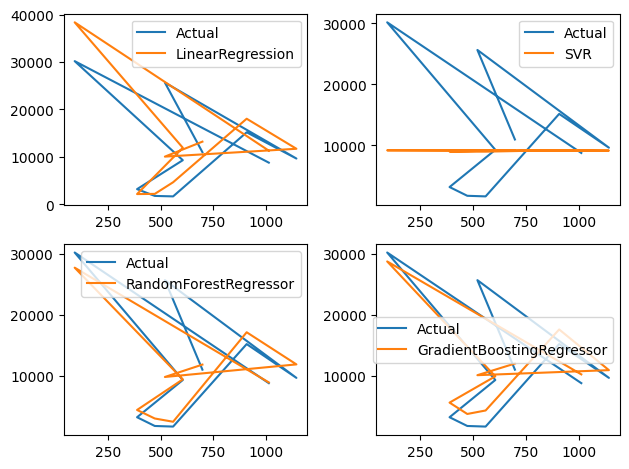

In [17]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:10],label='Actual')
plt.plot(df1['LinearRegression'].iloc[0:10], label='LinearRegression')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:10], label='Actual')
plt.plot(df1['SVR'].iloc[0:10], label='SVR')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:10], label='Actual')
plt.plot(df1['RandomForestRegressor'].iloc[0:10], label='RandomForestRegressor')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:10], label='Actual')
plt.plot(df1['GradientBoostingRegressor'].iloc[0:10], label='GradientBoostingRegressor')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Calculate the scores of the prediction test

In [18]:
from sklearn import metrics

#### Calculate the R-squared score

In [19]:
score1 = metrics.r2_score(y_test, y.pred1)
score2 = metrics.r2_score(y_test, y.pred2)
score3 = metrics.r2_score(y_test, y.pred3)
score4 = metrics.r2_score(y_test, y.pred4)

In [20]:
print(score1, score2, score3, score4)

0.7960709949046044 -0.12417212773288555 0.8867957592058812 0.9054494045670843


#### Calculate the mean-absolute-error score

In [21]:
s1 = metrics.mean_absolute_error(y_test, y.pred1)
s2 = metrics.mean_absolute_error(y_test, y.pred2)
s3 = metrics.mean_absolute_error(y_test, y.pred3)
s4 = metrics.mean_absolute_error(y_test, y.pred4)

In [22]:
print(s1, s2, s3, s4)

4035.60149967753 8378.208374239653 2346.1406901734454 2198.628350788841


#### From the graphs, r2-squared score and mean-absolute-error score, we can conclude y.pred4 (Gradient Boosting Regressor) is the most accurate method

# 10. Use the Joblib

#### Train the models with Gradient Boosting Regressor

In [23]:
gr.fit(X, y)

GradientBoostingRegressor()

In [24]:
import joblib

In [25]:
joblib.dump(gr,'GradientBoostingRegressor_Model')

['GradientBoostingRegressor_Model']

In [26]:
model = joblib.load('GradientBoostingRegressor_Model')

# 11. Make the GUI to prediction model 

In [27]:
from tkinter import *

In [ ]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('GradientBoostingRegressor_Model')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text='Insurance Cost').grid(row=7)
    Label(master, text=result).grid(row=8)
    
    
master = Tk()
master.title('Insurance Cost Prediciton using GR')
label = Label(master, text = 'Insurance Cost Prediction using GR', bg='white',
                 fg='black').grid(row=0,columnspan=2)

Label(master,text='Enter your Age').grid(row=1)
Label(master,text='Enter [0/1] for female/male').grid(row=2)
Label(master,text='Enter your BMI Value').grid(row=3)
Label(master,text='Enter of Children').grid(row=4)
Label(master,text='Enter [0/1] for non-smoker/smoker').grid(row=5)
Label(master,text='Enter [1-4] for your Region').grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text='Predict', command=show_entry).grid()


mainloop()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
